## Face Recognition HOG + SVM

### Bakytbek uulu Nurzhigit

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from skimage.feature import hog
from skimage import data, exposure

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)

In [3]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 11750
n_classes: 7


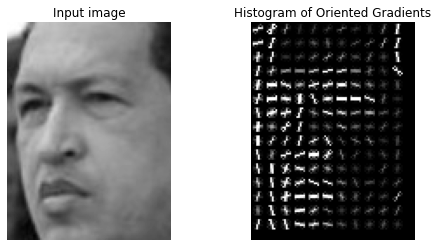

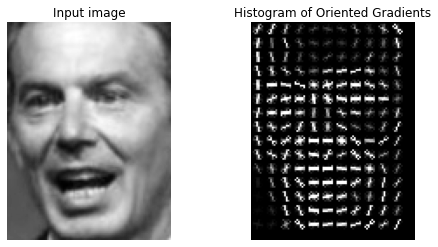

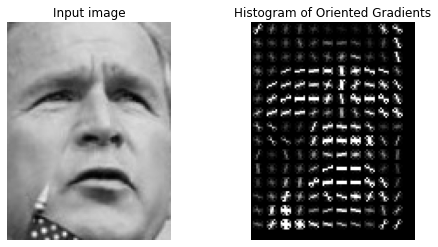

<Figure size 432x288 with 0 Axes>

In [22]:
def plot_faces(images):
    """Helper function to plot a gallery of portraits"""

    for i in range(len(images)):

        image = images[i].reshape((h, w))

        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(image, cmap=plt.cm.gray)
        ax1.set_title('Input image')

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        ax2.set_title('Histogram of Oriented Gradients')



        plt.show()

    plt.tight_layout()
    plt.show()
    
plot_faces(lfw_people.images[:3])

In [5]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [6]:
def hog_transform(X):
    
    Tr = []
    
    for image in X:
        
        image = image.reshape((h, w))

        fd = hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=False)
        
        fd = fd.flatten()
        Tr.append(fd)
    
    return Tr

In [7]:
X_train_hog = hog_transform(X_train)
X_test_hog = hog_transform(X_test)

In [8]:


param_grid = {'C': [0.001, 0.01, 0.1, 1],
               'kernel': ['poly', 'rbf']}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_hog, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1, class_weight='balanced', kernel='poly')


In [13]:
y_pred = clf.predict(X_test_hog)

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.82      0.90        11
     Colin Powell       0.96      0.96      0.96        47
  Donald Rumsfeld       0.89      0.77      0.83        22
    George W Bush       0.93      0.98      0.96       119
Gerhard Schroeder       1.00      0.95      0.97        19
      Hugo Chavez       1.00      0.69      0.82        13
       Tony Blair       0.87      0.96      0.91        27

         accuracy                           0.93       258
        macro avg       0.95      0.88      0.91       258
     weighted avg       0.94      0.93      0.93       258



In [15]:
y_test_name = []
y_pred_name = []

for i in range(y_test.shape[0]):
    y_test_name.append(target_names[y_test[i]])
    y_pred_name.append(target_names[y_pred[i]])

In [20]:
print(confusion_matrix(y_test_name, y_pred_name, labels=target_names))

[[  9   0   1   1   0   0   0]
 [  0  45   0   2   0   0   0]
 [  0   1  17   3   0   0   1]
 [  0   0   1 117   0   0   1]
 [  0   0   0   0  18   0   1]
 [  0   0   0   3   0   9   1]
 [  0   1   0   0   0   0  26]]


In [19]:
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
